In [7]:
#Importing the depandancies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

#Creating a dataframe of Titanic dataset with selected columns
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day39-knn-imputer/train.csv')[['Age','Pclass','Fare','Survived']]

In [8]:
#The dataframe looks like:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [9]:
#Finding the number of missing values
df.isna().sum()

Age         177
Pclass        0
Fare          0
Survived      0
dtype: int64

In [10]:
#Finding the missing value as percentage of total values
df.isna().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

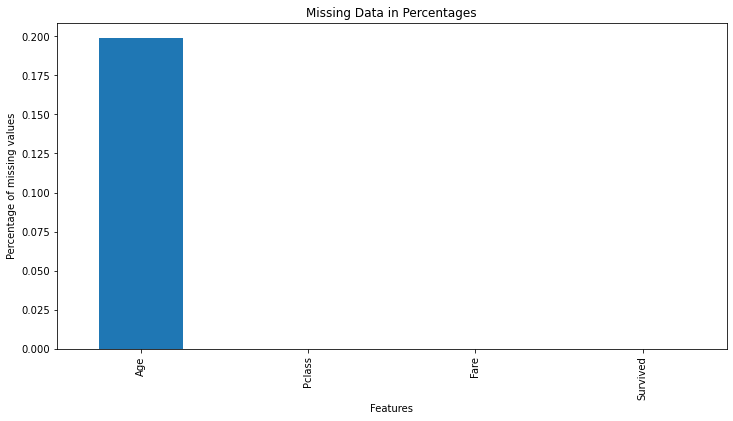

In [11]:
df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [12]:
# Determining the features and the target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
#Splitting the dataset into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
#Training features dataset looks like:
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [15]:
#Appliying the KNNImputer with weight == distance in order to account for the relative differences in distances between k nearest neighbours
#Creating an object KNN of class KNNImputer
knn = KNNImputer(n_neighbors=3,weights='uniform')

In [16]:
#Carrying out the imputation
X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators = 5000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

print("Mean Absolute Error from Imputation in percent:")
print(score_dataset(X_train_trf, X_test_trf, y_train, y_test)*100)

Mean Absolute Error from Imputation in percent:
37.048589332306356


In [18]:
cols_with_missing = [col for col in X_train.columns 
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values in percent:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test)*100)

Mean Absolute Error from dropping columns with Missing Values in percent:
36.12795074849826


In [23]:
lr = LogisticRegression()
lr.fit(X_train_trf,y_train)
y_pred = lr.predict(X_test_trf)
mae = mean_absolute_error(y_test,y_pred)
mae

0.29608938547486036

In [20]:
lr.fit(reduced_X_train, y_train)
y_pred = lr.predict(reduced_X_test)
mae =mean_absolute_error(y_test, y_pred)
mae

0.33519553072625696